In [1]:
import pandas as pd
import numpy as np

In [2]:
CEC = pd.read_csv('./data/Energy_Commission_Power_Plant_ID_Cross_Reference_Table_2021_ADA.csv')
PowerPlant = pd.read_csv('./data/California_Power_Plants.csv')
Node = pd.read_csv('./data/ATL_FNM_MAPPING_DATA_GRP_CISO_AS_22M7_DB114_v5.csv')

In [3]:
CEC

,CECPlantID,PlantName,EIAPlantID,ResourceID,Resource ID Name,Energy Source Category,City,County,State
0,B0001,Vaca Dixon Battery Storage,59256.0,VACADX_1_NAS,NaN,BATTERY,Vacaville,Solano,CA
1,B0002,Tehachapi Storage Project,59661.0,MONLTH_6_BATTRY,Tehachapi Storage Project,BATTERY,Tehachapi,Kern,CA
2,B0003,Yerba Buena Battery,59257.0,SWIFT_1_NAS,NaN,BATTERY,San Jose,Santa Clara,CA
3,B0004,Millikan Avenue BESS,60760.0,SANTGO_2_MABBT1,Millikan Avenue BESS,BATTERY,Irvine,Orange,CA
4,B0005,Mira Loma BESS A,60661.0,MIRLOM_2_MLBBTA,Mira Loma BESS A,BATTERY,Ontario,San Bernardino,CA
...,...,...,...,...,...,...,...,...,...
1864,W0479,"Coachella Wind Holdings, LLC",64323.0,ALTWD_2_COAWD1,Coachella 1,WIND,Desert Hot Springs,Riverside,CA
1865,W0480,"Oasis Alta, LLC",63941.0,VOYAGR_2_VOAWD5,Voyager Wind Oasis Alta,WIND,Mojave,Kern,CA
1866,W0481,Point Wind,63482.0,TEHAPI_2_PW1WD1,Point Wind 1,WIND,Tehachapi,Kern,CA
1867,W0482,Altamont Winds LLC,64326.0,NaN,NaN,WIND,Livermore,Alameda,CA


In [4]:
PowerPlant

,X,Y,OBJECTID_1,CECPlantID,PlantName,EIAPlantID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,...,State,Zip,Capacity_Latest,Units,PriEnergySource,LastReportedYear,Lon_WGS84,Lat_WGS84,Annual_Hyperlink,Monthly_Hyperlink
0,-1.338598e+07,4.454253e+06,1873,G0896,Chowchilla II Peaker,56185,0,0,1,0,...,CA,93610.0,0.00,NaN,NaN,2021.0,-120.248340,37.108582,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...
1,-1.361147e+07,4.919580e+06,1874,S9312,Pristine Sun Fund 5 LLC_(2021_Doran),MISSING,1,1,0,0,...,CA,NaN,1.50,Unit 1,SUN,2021.0,-122.273911,40.368108,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...
2,-1.360463e+07,4.887791e+06,1875,G0897,Red Bluff,56184,0,0,1,0,...,CA,96080.0,0.00,NaN,NaN,2021.0,-122.212471,40.150187,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...
3,-1.360025e+07,4.858596e+06,1876,S9313,Pristine Sun Fund 5 LLC_(2040_Alvares),MISSING,1,1,0,0,...,CA,NaN,1.50,Unit 1,SUN,2021.0,-122.173114,39.949427,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...
4,-1.318512e+07,4.072714e+06,1877,G0899,Olive View Medical Center,10884,0,1,0,0,...,CA,91342.0,5.78,"GTU #1, GTU #2",NG,2021.0,-118.443953,34.326398,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,-1.334979e+07,4.326713e+06,3740,S0721,Aquamarine Westside,62547,1,0,0,0,...,CA,93266.0,250.00,W12082,SUN,2021.0,-119.923236,36.189391,NaN,NaN
1868,-1.283870e+07,3.978829e+06,3741,S0722,"Maverick Solar 6, LLC",64105,1,0,0,0,...,CA,92239.0,100.00,Unit 1,SUN,2021.0,-115.332020,33.627018,NaN,NaN
1869,-1.283870e+07,3.978829e+06,3742,S0723,"Maverick Solar 7, LLC",64106,1,0,0,0,...,CA,92239.0,132.00,Unit 1,NaN,2021.0,-115.332020,33.627018,NaN,NaN
1870,-1.335358e+07,4.325432e+06,3743,S0724,RE Slate 1,62780,1,0,0,0,...,CA,93266.0,300.00,Unit 1,SUN,2021.0,-119.957268,36.180109,NaN,NaN


In [5]:
Node

,AS_ID,RES_TYPE,RES_ID,PNODE_ID,BUS_ID,FNMVERSION,RELEASE_DATE,GROUP
0,AS_SP15,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1
1,AS_NP26,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1
2,AS_SP15,LOAD,7STDRD_7_LD1,0096WD_7_N002,35009_0096_WD _21.6_LD1,22M7_DB114,2022-07-28T00:00:00,2
3,AS_NP26,LOAD,7STDRD_7_LD1,0096WD_7_N002,35009_0096_WD _21.6_LD1,22M7_DB114,2022-07-28T00:00:00,2
4,AS_SP26_EXP,TIE,83MB230,MIDWYGN_7_N002,21673_MIDWY GN_34.5_GUS1,22M7_DB114,2022-07-28T00:00:00,3
...,...,...,...,...,...,...,...,...
10775,AS_NP26,LOAD,ZENO_6_LD-T1,ZENO_6_N001,36891_Zeno _60.0_LD1,22M7_DB114,2022-07-28T00:00:00,5375
10776,AS_NP26,LOAD,ZENO_6_LD-T2,ZENO_6_N002,36891_Zeno _60.0_LD2,22M7_DB114,2022-07-28T00:00:00,5376
10777,AS_NP15,LOAD,ZENO_6_LD-T2,ZENO_6_N002,36891_Zeno _60.0_LD2,22M7_DB114,2022-07-28T00:00:00,5376
10778,AS_NP15,GEN,ZOND_6_UNIT,ZONDWD_6_B1,35204_ZONDWD _60.0_GU1,22M7_DB114,2022-07-28T00:00:00,5377


In [6]:
columns = Node.columns
nodes_arr = Node.to_numpy()
cec_arr = CEC.to_numpy()
new_nodes = np.zeros((nodes_arr.shape[0],nodes_arr.shape[1]+1),dtype=object)
print(new_nodes.shape)

for i in range(nodes_arr.shape[0]):
    for cec in cec_arr:
        if(cec[3]==nodes_arr[i][2]):
            new_nodes[i][:-1] = nodes_arr[i]
            new_nodes[i][-1] = cec[0]

    if new_nodes[i][-1]==0: 
        new_nodes[i][:-1] = nodes_arr[i]
        new_nodes[i][-1] = 'NaN'
    
#     print(new_nodes[i])

# print(new_nodes)

(10780, 9)


In [7]:
plant = np.zeros((CEC.shape[0],new_nodes.shape[1]),dtype=object)
i = 0;
for node in new_nodes:
    if(node[-1]!='NaN'):
#         print(node)
        plant[i] = node;
        i += 1
    
# pd.DataFrame(new_nodes)

In [8]:
# Crop off
plant = plant[:i]

In [15]:
# Map x,y
complete = np.zeros((CEC.shape[0],new_nodes.shape[1]+2),dtype=object)
i = 0
count = 0
for i in range(plant.shape[0]):
    for a in PowerPlant.to_numpy():
        if(a[3]==plant[i][-1]):
#             print(p)
#             print(complete[i][:-1].shape)
            complete[i][0:-2] = plant[i]
            complete[i][-2] = a[0]
            complete[i][-1] = a[1]
            count += 1
    
    if complete[i][-1]==0: 
        
        complete[i][0:-2] = plant[i]
        complete[i][-2] = 'NaN'
        complete[i][-1] = 'NaN'

print(complete)

[['AS_SP15' 'GEN' '7STDRD_1_SOLAR1' ... 'S0330' -13261143.4802
  4225269.8921]
 ['AS_NP26' 'GEN' '7STDRD_1_SOLAR1' ... 'S0330' -13261143.4802
  4225269.8921]
 ['AS_SP26' 'GEN' 'ACACIA_6_SOLAR' ... 'S0318' -13172193.2881 4122304.874]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
final = pd.DataFrame(complete[0:count])
final

,0,1,2,3,4,5,6,7,8,9,10
0,AS_SP15,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1,S0330,-13261143.4802,4225269.8921
1,AS_NP26,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1,S0330,-13261143.4802,4225269.8921
2,AS_SP26,GEN,ACACIA_6_SOLAR,ACACIA_7_N001,29876_ACACIA _34.5_GU1,22M7_DB114,2022-07-28T00:00:00,5,S0318,-13172193.2881,4122304.874
3,AS_SP15,GEN,ACACIA_6_SOLAR,ACACIA_7_N001,29876_ACACIA _34.5_GU1,22M7_DB114,2022-07-28T00:00:00,5,S0318,-13172193.2881,4122304.874
4,AS_NP26,GEN,ADERA_1_SOLAR1,ADERAG1_7_N001,34117_ADERA G1_34.5_GU1,22M7_DB114,2022-07-28T00:00:00,7,S0421,-13394404.1589,4455992.6978
...,...,...,...,...,...,...,...,...,...,...,...
1711,AS_NP26,GEN,YUBACT_1_SUNSWT,YUBACTY_7_B1,32494_YUBA CTY_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5364,G0686,-13540690.7632,4741563.3136
1712,AS_NP15,GEN,YUBACT_6_UNITA1,YCCOGEN_7_B1,32962_YC COGEN_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5366,G0919,-13540758.0245,4741626.8218
1713,AS_NP26,GEN,YUBACT_6_UNITA1,YCCOGEN_7_B1,32962_YC COGEN_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5366,G0919,-13540758.0245,4741626.8218
1714,AS_NP15,GEN,ZOND_6_UNIT,ZONDWD_6_B1,35204_ZONDWD _60.0_GU1,22M7_DB114,2022-07-28T00:00:00,5377,W0331,-13541559.6533,4542733.4636


In [17]:
theCol = np.asarray(columns)
theCol = np.append(theCol,'CEC Plant ID')
theCol = np.append(theCol,'Lng')
theCol = np.append(theCol,'Lat')
final = pd.DataFrame(complete[0:count],columns=theCol)

In [18]:
final

,AS_ID,RES_TYPE,RES_ID,PNODE_ID,BUS_ID,FNMVERSION,RELEASE_DATE,GROUP,CEC Plant ID,Lng,Lat
0,AS_SP15,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1,S0330,-13261143.4802,4225269.8921
1,AS_NP26,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1,S0330,-13261143.4802,4225269.8921
2,AS_SP26,GEN,ACACIA_6_SOLAR,ACACIA_7_N001,29876_ACACIA _34.5_GU1,22M7_DB114,2022-07-28T00:00:00,5,S0318,-13172193.2881,4122304.874
3,AS_SP15,GEN,ACACIA_6_SOLAR,ACACIA_7_N001,29876_ACACIA _34.5_GU1,22M7_DB114,2022-07-28T00:00:00,5,S0318,-13172193.2881,4122304.874
4,AS_NP26,GEN,ADERA_1_SOLAR1,ADERAG1_7_N001,34117_ADERA G1_34.5_GU1,22M7_DB114,2022-07-28T00:00:00,7,S0421,-13394404.1589,4455992.6978
...,...,...,...,...,...,...,...,...,...,...,...
1711,AS_NP26,GEN,YUBACT_1_SUNSWT,YUBACTY_7_B1,32494_YUBA CTY_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5364,G0686,-13540690.7632,4741563.3136
1712,AS_NP15,GEN,YUBACT_6_UNITA1,YCCOGEN_7_B1,32962_YC COGEN_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5366,G0919,-13540758.0245,4741626.8218
1713,AS_NP26,GEN,YUBACT_6_UNITA1,YCCOGEN_7_B1,32962_YC COGEN_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5366,G0919,-13540758.0245,4741626.8218
1714,AS_NP15,GEN,ZOND_6_UNIT,ZONDWD_6_B1,35204_ZONDWD _60.0_GU1,22M7_DB114,2022-07-28T00:00:00,5377,W0331,-13541559.6533,4542733.4636


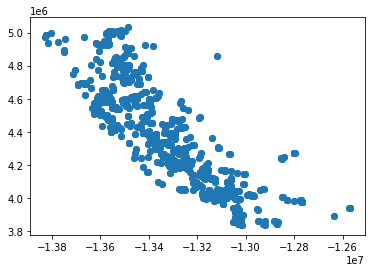

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x=final['Lng'], y=final['Lat'])
plt.show()